In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Note: Text will not be printed if "Both" is selected.
Select Data (Village/Pipes/Both): Village
Note: Selecting "Meter" will decrease surface resolution.
Enter Unit (Meter/Degree): Meter


<IPython.core.display.Javascript object>


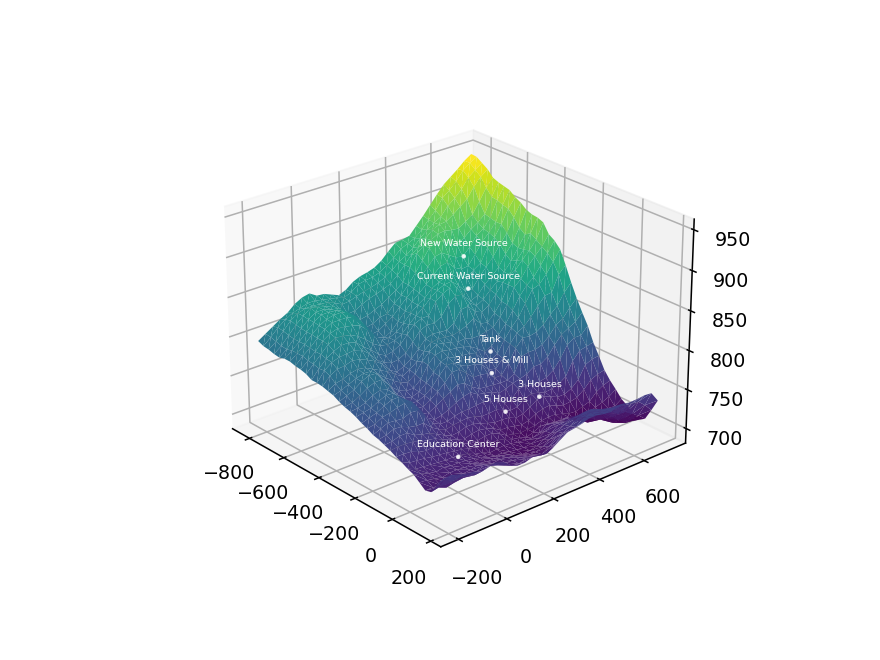

,Label,Longitude (°),Latitude (°),MASL,X (m),Y (m)
0,New Water Source,-83.723881,9.790591,848,-644.341002,541.550905
1,Tank,-83.721265,9.789578,768,-357.373703,428.789990
2,Current Water Source,-83.723156,9.790198,819,-564.807085,497.808883
3,3 Houses,-83.719242,9.789877,732,-135.420715,462.119121
4,5 Houses,-83.719312,9.788595,728,-143.144882,319.406827
5,Education Center,-83.718007,9.785726,726,0.000000,0.000000
6,3 Houses & Mill,-83.720492,9.789003,757,-272.524695,364.800378


In [2]:
POE = pd.read_excel('Taus_Point_Elevation.xlsx')
POI = pd.read_excel('Taus_Point_Interest.xlsx')
POP = pd.read_excel('Taus_Point_Interest_Pipes.xlsx')

print('\033[1m' + 'Note: Text will not be printed if "Both" is selected.' + '\033[0m')
taus = input('Select Data (Village/Pipes/Both): ', ).capitalize()

print('\033[1m' + 'Note: Selecting "Meter" will decrease surface resolution.' + '\033[0m')
unit = input('Enter Unit (Meter/Degree): ', ).capitalize()

if unit == 'Meter':
    col_x = 'CONVERT_X'
    col_y = 'CONVERT_Y'
else:
    col_x = 'POINT_X'
    col_y = 'POINT_Y'

X = np.array(POE.loc[:, col_x])
Y = np.array(POE.loc[:, col_y])
Z = np.array(POE.loc[:, 'POINT_Z'])

ax = plt.axes(projection = '3d', computed_zorder = False)
ax.plot_trisurf(X, Y, Z, cmap = 'plasma')

if (taus == 'Village') or (taus == 'Both'):
    taus_x = np.array(POI.loc[:, col_x])
    taus_y = np.array(POI.loc[:, col_y])
    taus_z = np.array(POI.loc[:, 'POINT_Z'])
    labels = list(POI.loc[:, 'LABEL'])
    ax.scatter(taus_x, taus_y, taus_z, s = 2, color = 'w', alpha = 0.8)
    if taus != 'Both':
        for point in range(len(list(taus_x))):
            ax.text(list(taus_x)[point], list(taus_y)[point], list(taus_z)[point] + 16, f'{list(labels)[point]}', size = 5, color = 'w', ha = 'center', va = 'center')
    POI = POI.rename(columns = {'LABEL': 'Label', 'POINT_X': 'Longitude (°)', 'POINT_Y': 'Latitude (°)', 'POINT_Z': 'MASL', 'CONVERT_X': 'X (m)', 'CONVERT_Y': 'Y (m)'})


if (taus == 'Pipes') or (taus == 'Both'):
    pipes_x = np.array(POP.loc[:, col_x])
    pipes_y = np.array(POP.loc[:, col_y])
    pipes_z = np.array(POP.loc[:, 'POINT_Z'])
    pipe_labels = list(POP.loc[:, 'LABEL'])
    ax.scatter(pipes_x, pipes_y, pipes_z, s = 1, color = 'cyan', alpha = 0.8)
    if taus != 'Both':
        for point in range(len(list(pipes_x))):
            ax.text(list(pipes_x)[point], list(pipes_y)[point], list(pipes_z)[point] + 16, f'{list(pipe_labels)[point]}', size = 5, color = 'cyan', ha = 'center', va = 'center')
    POP = POP.rename(columns = {'LABEL': 'Label', 'POINT_X': 'Longitude (°)', 'POINT_Y': 'Latitude (°)', 'POINT_Z': 'MASL', 'CONVERT_X': 'X (m)', 'CONVERT_Y': 'Y (m)'})


plt.show()

if (taus == 'Village') or (taus == 'Both'):
    display(POI.loc[:, ~POI.columns.isin(['OBJECTID', 'DIFF_X', 'DIFF_Y'])])
if (taus == 'Pipes') or (taus == 'Both'):
    display(POP.loc[:, ~POI.columns.isin(['OBJECTID', 'DIFF_X', 'DIFF_Y'])])